c:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


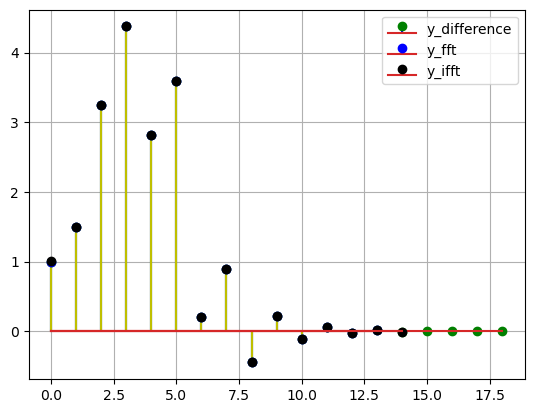

In [2]:
from turtle import color
import matplotlib .pyplot as plt
import numpy as np
from scipy.fft import fft,ifft


y1 = np.loadtxt("data.dat",dtype = np.double)


N = 14
n = np.arange(N)
fn=(-1/2)**n
hn1=np.pad(fn, (0,2), 'constant', constant_values=(0))
hn2=np.pad(fn, (2,0), 'constant', constant_values=(0))
h = hn1+hn2

xtemp=np.array([1.0,2.0,3.0,4.0,2.0,1.0])
x=np.pad(xtemp, (0,8), 'constant', constant_values=(0))

X = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		X[k]+=x[n]*np.exp(-1j*2*np.pi*n*k/N)
H = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		H[k]+=h[n]*np.exp(-1j*2*np.pi*n*k/N)

Y = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	Y[k] = X[k]*H[k]

y2 = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		y2[k]+=Y[n]*np.exp(1j*2*np.pi*n*k/N)

#print(X)
y2 = np.real(y2)/N

x=np.array([1,2,3,4,2,1])
x=np.pad(x,(0,9),'constant',constant_values=(0))
N=15
def hn(n):
    if n<0:
        return 0
    if 0<=n<2:
       return (-1/2)**n
    else:
        return (-1/2)**n+(-1/2)**(n-2)
#computing the above using fft and ifft
xk1=fft(x)
htemp=np.array([hn(i) for i in range(N)])
hk1=fft(htemp)
yk1=xk1*hk1
yn1=ifft(yk1)
ntemp=np.array(list(range(N)))

# plt.stem(range(0,19),y1,label='sin')
# plt.setp('blue', plt.getp(markerline,'blue'))
# # plt.setp(stemlines, 'linestyle', 'dotted')

# plt.stem(range(0,N),y2,label = 'cos')
# plt.setp('red', plt.getp(markerline,'red'))
# # plt.setp(stemlines, 'linestyle', 'dotted')

# plt.title('Filter Output using DFT')
# plt.xlabel('$n$')
# plt.ylabel('$y(n)$')
# plt.grid()
# plt.show()

plt.stem(range(0,19),y1, 'b', markerfmt='go', label='y_difference')
plt.stem(range(0,14),y2, 'g', markerfmt='bo', label='y_fft')
plt.stem(range(0,15),yn1, 'y', markerfmt='ko', label='y_ifft')
plt.legend()
plt.grid()
plt.show()